In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## 1-(a)
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/gdrive/MyDrive/Data/abalone.csv', header = None)
idx = np.random.permutation(data.shape[0])
data_size = np.concatenate(([0], np.repeat(418, 7), np.repeat(417, 3)))
cum_data_size = np.cumsum(data_size)

In [ ]:
null_train_mse = []
null_test_mse = []
for test_idx in range(10) :
  train_idx = list(range(10))
  train_idx.pop(test_idx)
  train_data = data.drop(idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])])
  test_data = data.iloc[idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])].tolist()]
  res = LinearRegression().fit(np.ones((len(train_data), 7)), train_data.iloc[:, -1])
  null_train_mse.append(mean_squared_error(train_data.iloc[:, -1], res.predict(np.ones((len(train_data), 7)))))
  null_test_mse.append(mean_squared_error(test_data.iloc[:, -1], res.predict(np.ones((len(test_data), 7)))))

In [ ]:
print('Average training MSE :', np.mean(null_train_mse))
print('Average test MSE :', np.mean(null_test_mse))

Average training MSE : 10.392253200259098
Average test MSE : 10.402865553362245


In [ ]:
## 1-(b)
import math
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

lamb = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
train_mse = np.zeros((10, 6))
test_mse = np.zeros((10, 6))
train_score = np.zeros((10, 6))
test_score = np.zeros((10, 6))
logdet = np.zeros((10, 6))
for i, l in enumerate(lamb):
  for test_idx in range(10):
    train_idx = list(range(10))
    train_idx.pop(test_idx)
    train_data = data.drop(idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])])
    test_data = data.iloc[idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])].tolist()]
    res = Ridge(alpha = l * len(train_data)).fit(train_data.iloc[:, 0:7], train_data.iloc[:, -1])
    train_mse[test_idx, i] = mean_squared_error(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    test_mse[test_idx, i] = mean_squared_error(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))
    train_score[test_idx, i] = r2_score(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    test_score[test_idx, i] = r2_score(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))
    train_data = train_data / math.sqrt(len(train_data))
    logdet[test_idx, i] = np.log(np.linalg.det(np.matmul(np.transpose(train_data.iloc[:, 0:7]), train_data.iloc[:, 0:7]) + l * np.ones((7, 7))))

In [ ]:
print(pd.DataFrame({'Lambda' : lamb,
                    'Avg training R sq.' : np.mean(train_score, axis = 0),
                    'Avg test R sq.' : np.mean(test_score, axis = 0), 'Avg training MSE' : np.mean(train_mse, axis = 0), 'Avg test MSE' : np.mean(test_mse, axis = 0)}))

    Lambda  Avg training R sq.  Avg test R sq.  Avg training MSE  Avg test MSE
0  0.00000            0.528099        0.512175          4.904056      5.043465
1  0.00001            0.528085        0.513079          4.904201      5.034361
2  0.00010            0.527272        0.517329          4.912655      4.991905
3  0.00100            0.511626        0.507720          5.075278      5.094724
4  0.01000            0.397716        0.394093          6.259068      6.271491
5  0.10000            0.288873        0.285017          7.390200      7.401325


In [ ]:
print(pd.DataFrame({'Lambda' : lamb,
                    'Std training R sq.' : np.std(train_score, axis = 0),
                    'Std test R sq.' : np.std(test_score, axis = 0),
                    'Std training MSE' : np.std(train_mse, axis = 0),
                    'Std test MSE' : np.std(test_mse, axis = 0)}))

    Lambda  Std training R sq.  Std test R sq.  Std training MSE  Std test MSE
0  0.00000            0.003067        0.039495          0.038948      0.451013
1  0.00001            0.003065        0.037479          0.038944      0.435007
2  0.00010            0.002978        0.028556          0.038818      0.375799
3  0.00100            0.002805        0.026311          0.041819      0.407628
4  0.01000            0.003189        0.032800          0.051204      0.514686
5  0.10000            0.003938        0.030871          0.063157      0.568201


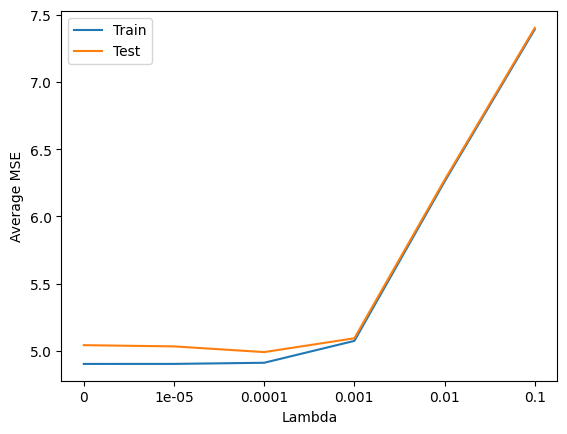

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(lamb)), np.mean(train_mse, axis = 0))
plt.plot(np.arange(len(lamb)), np.mean(test_mse, axis = 0))
plt.xticks(np.arange(len(lamb)), [str(x) for x in lamb])
plt.legend(['Train', 'Test'])
plt.xlabel('Lambda')
plt.ylabel('Average MSE')
plt.show()

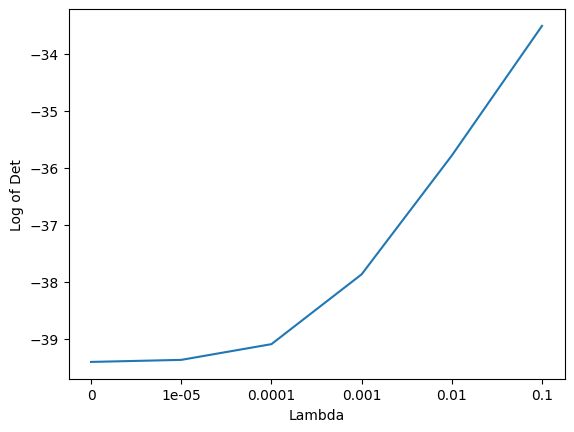

In [ ]:
plt.plot(np.arange(len(lamb)), np.mean(logdet, axis = 0))
plt.xticks(np.arange(len(lamb)), [str(x) for x in lamb])
plt.xlabel('Lambda')
plt.ylabel('Log of Det')
plt.show()

In [ ]:
## 1-(c)
from sklearn.tree import DecisionTreeRegressor

train_mse = np.zeros((10, 7))
test_mse = np.zeros((10, 7))
train_score = np.zeros((10, 7))
test_score = np.zeros((10, 7))
for depth in range(7):
  for test_idx in range(10):
    train_idx = list(range(10))
    train_idx.pop(test_idx)
    train_data = data.drop(idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])])
    test_data = data.iloc[idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])].tolist()]
    res = DecisionTreeRegressor(max_depth = depth + 1).fit(train_data.iloc[:, 0:7], train_data.iloc[:, -1])
    train_mse[test_idx, depth] = mean_squared_error(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    test_mse[test_idx, depth] = mean_squared_error(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))
    train_score[test_idx, depth] = r2_score(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    test_score[test_idx, depth] = r2_score(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))

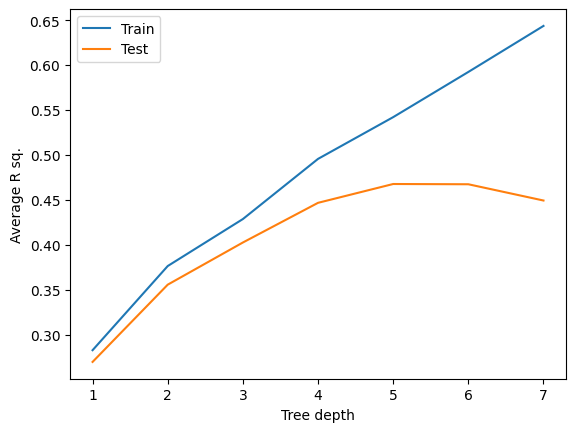

In [ ]:
plt.plot(np.arange(7) + 1, np.mean(train_score, axis = 0))
plt.plot(np.arange(7) + 1, np.mean(test_score, axis = 0))
plt.legend(['Train', 'Test'])
plt.xlabel('Tree depth')
plt.ylabel('Average R sq.')
plt.show()

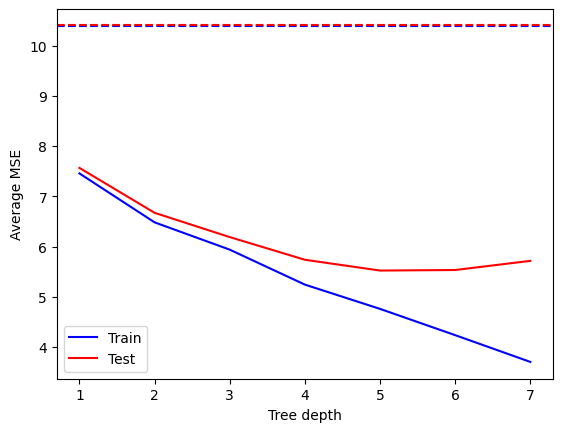

In [ ]:
plt.plot(np.arange(1, 8), np.mean(train_mse, axis = 0), color = 'b')
plt.plot(np.arange(1, 8), np.mean(test_mse, axis = 0), color = 'r')
plt.axhline(y = np.mean(null_train_mse), color = 'b', linestyle = 'dashed')
plt.axhline(y = np.mean(null_test_mse), color = 'r', linestyle = 'dashed')
plt.legend(['Train', 'Test'])
plt.xlabel('Tree depth')
plt.ylabel('Average MSE')
plt.show()

In [ ]:
## 1-(d)
from sklearn.ensemble import RandomForestRegressor

params = [10, 30, 100, 300]
train_mse = np.zeros((10, 4))
oob_mse = np.zeros((10, 4))
test_mse = np.zeros((10, 4))
train_score = np.zeros((10, 4))
oob_score = np.zeros((10, 4))
test_score = np.zeros((10, 4))
for i, num_tree in enumerate(params):
  for test_idx in range(10):
    train_idx = list(range(10))
    train_idx.pop(test_idx)
    train_data = data.drop(idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])])
    test_data = data.iloc[idx[np.arange(cum_data_size[test_idx], cum_data_size[test_idx + 1])].tolist()]
    res = RandomForestRegressor(n_estimators = num_tree, oob_score = True).fit(train_data.iloc[:, 0:7], train_data.iloc[:, -1])
    train_mse[test_idx, i] = mean_squared_error(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    oob_mse[test_idx, i] = mean_squared_error(train_data.iloc[:, -1], res.oob_prediction_)
    test_mse[test_idx, i] = mean_squared_error(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))
    train_score[test_idx, i] = r2_score(train_data.iloc[:, -1], res.predict(train_data.iloc[:, 0:7]))
    oob_score[test_idx, i] = res.oob_score_
    test_score[test_idx, i] = r2_score(test_data.iloc[:, -1], res.predict(test_data.iloc[:, 0:7]))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too fe

In [ ]:
print(pd.DataFrame({'Number of Trees' : params,
                    'Avg training R sq.' : np.mean(train_score, axis = 0),
                    'Avg OOB R sq.' : np.mean(oob_score, axis = 0),
                    'Avg test R sq.' : np.mean(test_score, axis = 0)}))
print(pd.DataFrame({'Number of Trees' : params,
                    'Avg training MSE' : np.mean(train_mse, axis = 0),
                    'Avg OOB MSE' : np.mean(oob_mse, axis = 0),
                    'Avg test MSE' : np.mean(test_mse, axis = 0)}))
print(pd.DataFrame({'Number of Trees' : params,
                    'Std training R sq.' : np.std(train_score, axis = 0),
                    'Std OOB R sq.' : np.std(oob_score, axis = 0),
                    'Std test R sq.' : np.std(test_score, axis = 0)}))
print(pd.DataFrame({'Number of Trees' : params,
                    'Std training MSE' : np.std(train_mse, axis = 0),
                    'Std OOB MSE' : np.std(oob_mse, axis = 0),
                    'Std test MSE' : np.std(test_mse, axis = 0)}))

   Number of Trees  Avg training R sq.  Avg OOB R sq.  Avg test R sq.
0               10            0.910835       0.294463        0.509751
1               30            0.928941       0.497745        0.527452
2              100            0.935412       0.530564        0.539670
3              300            0.936976       0.537405        0.541070
   Number of Trees  Avg training MSE  Avg OOB MSE  Avg test MSE
0               10          0.926638     7.332754      5.080589
1               30          0.738435     5.219799      4.899768
2              100          0.671242     4.878663      4.774412
3              300          0.654978     4.807554      4.761092
   Number of Trees  Std training R sq.  Std OOB R sq.  Std test R sq.
0               10            0.002677       0.016508        0.032215
1               30            0.001329       0.006235        0.037074
2              100            0.000898       0.005565        0.039806
3              300            0.000723       0.005

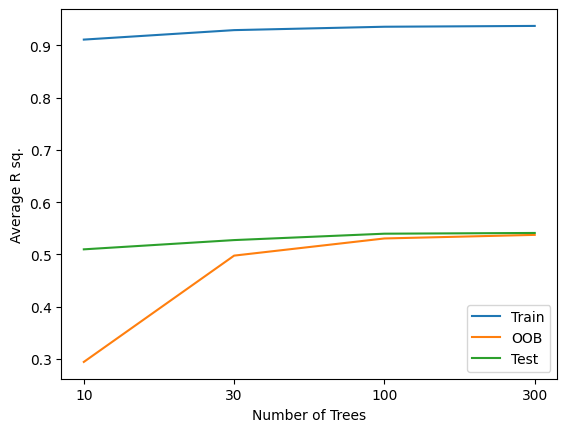

In [ ]:
plt.plot(np.arange(1, 5), np.mean(train_score, axis = 0))
plt.plot(np.arange(1, 5), np.mean(oob_score, axis = 0))
plt.plot(np.arange(1, 5), np.mean(test_score, axis = 0))
plt.legend(['Train', 'OOB', 'Test'])
plt.xticks(np.arange(1, 5), [str(x) for x in params])
plt.xlabel('Number of Trees')
plt.ylabel('Average R sq.')
plt.show()